In [40]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet101V2
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# lets look at the filepath
path = "D:\\DSS_Visual_Analytics_XAI\\MICSurv Medical Image Clustering for survival clusters identification\\Head_CT_hemorrhage\\head_ct"
filedirectory = []
for files in os.listdir(path):
    filedirectorys = filedirectory.append(os.path.join(path,files))
filedirectory

['D:\\DSS_Visual_Analytics_XAI\\MICSurv Medical Image Clustering for survival clusters identification\\Head_CT_hemorrhage\\head_ct\\head_ct']

TRIALS (DONT USE)

In [41]:
path = "D:\\DSS_Visual_Analytics_XAI\\MICSurv Medical Image Clustering for survival clusters identification\\Head_CT_hemorrhage\\head_ct"

train_images_list = glob(os.path.join(path,'head_ct','*.png'))



In [42]:
train_images_list

['D:\\DSS_Visual_Analytics_XAI\\MICSurv Medical Image Clustering for survival clusters identification\\Head_CT_hemorrhage\\head_ct\\head_ct\\000.png',
 'D:\\DSS_Visual_Analytics_XAI\\MICSurv Medical Image Clustering for survival clusters identification\\Head_CT_hemorrhage\\head_ct\\head_ct\\001.png',
 'D:\\DSS_Visual_Analytics_XAI\\MICSurv Medical Image Clustering for survival clusters identification\\Head_CT_hemorrhage\\head_ct\\head_ct\\002.png',
 'D:\\DSS_Visual_Analytics_XAI\\MICSurv Medical Image Clustering for survival clusters identification\\Head_CT_hemorrhage\\head_ct\\head_ct\\003.png',
 'D:\\DSS_Visual_Analytics_XAI\\MICSurv Medical Image Clustering for survival clusters identification\\Head_CT_hemorrhage\\head_ct\\head_ct\\004.png',
 'D:\\DSS_Visual_Analytics_XAI\\MICSurv Medical Image Clustering for survival clusters identification\\Head_CT_hemorrhage\\head_ct\\head_ct\\005.png',
 'D:\\DSS_Visual_Analytics_XAI\\MICSurv Medical Image Clustering for survival clusters identif

CREATE y labels for all the data subsets 

In [43]:
from numpy import asarray
from keras.preprocessing.image import img_to_array
from PIL import Image 
import cv2

print(len(train_images_list))

train_images = []
labels_exl = []
labels_inc = []
for i in range(len(train_images_list)):
    #img = Image.open(train_images_list[i])
    #img.thumbnail(size=(256, 256))
    #img = img.resize((256,256))
    # convert image to numpy array
    img = cv2.imread( train_images_list[i], cv2.COLOR_BGR2RGB)
    #data = img_to_array(img)
    data = cv2.resize(img, (256, 256),interpolation = cv2.INTER_AREA)
    data=np.array(data)
    train_images.append(data)
    #if data.shape == (256,256,4):
    #    train_images.append(data)
    #    labels_inc.append(i)
    #if data.shape != (256,256,4):
    #    labels_exl.append(i)
        
print(len(train_images))

print(train_images[0].shape)

train_images_array = np.array(train_images)

print(train_images_array.shape)




200
200
(256, 256, 3)
(200, 256, 256, 3)


In [22]:
64*4

256

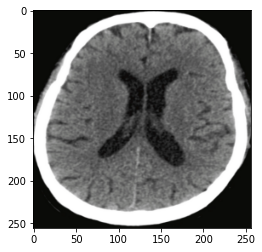

In [190]:
plt.imshow(train_images_array[180])

In [71]:
from sklearn.model_selection import train_test_split


labels = pd.read_csv('D:\\DSS_Visual_Analytics_XAI\\MICSurv Medical Image Clustering for survival clusters identification\\Head_CT_hemorrhage\\labels.csv', sep=',')
labels = labels.drop(columns=["id"])

x_train, x_test, y_train, y_test = train_test_split(train_images_array, labels.values.reshape(1,-1)[0], test_size=0.45)

print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(110, 256, 256, 3)
(90, 256, 256, 3)
(110,)
(90,)


In [51]:
print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(110, 256, 256, 3)
(90, 256, 256, 3)
(110,)
(90,)


In [89]:
y_test

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0], dtype=int64)

DATA AUGMENTATION 

In [222]:
from numpy import expand_dims

X_new = []
for i in range(len(X)):
    # load the image
    img = X[i]
    # convert to numpy array
    data = img_to_array(img)
    # expand dimension to one sample
    samples = expand_dims(data, 0)
    # create image data augmentation generator
    datagen = ImageDataGenerator(rotation_range=90)
    # prepare iterator
    it = datagen.flow(samples, batch_size=1)
    # generate samples and plot
    for i in range(9):
        # define subplot
        #pyplot.subplot(330 + 1 + i)
        # generate batch of images
        batch = it.next()
        # convert to unsigned integers for viewing
        image = batch[0].astype('uint8')
        X_new.append(image)
        
X_new_array = np.array(X_new)
print(X_new_array.shape)

y_new = []
for i in y:
    for j in range(9):
        y_new.append(i)
        
y_new_array = np.array(y_new)
print(y_new_array.shape)

(1800,)

In [227]:
j = []
for i in X_new_array:
    j.append(i.reshape(i.shape[0], i.shape[1]*i.shape[2]))
    
X_new_array = np.array(j)
x_train, x_test, y_train, y_test = train_test_split(X_new_array, y_new_array, test_size=0.30)

print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(1260, 256, 256)
(540, 256, 256)
(1260,)
(540,)


In [125]:
x_train = x_train_
x_test = x_test_

print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(140, 256, 768)
(60, 256, 768)
(140,)
(60,)


MNIST MEDICAL DATASET

In [44]:
data = np.load('C:\\Users\\geo_m\\Downloads\\breastmnist.npz')
print(data.files)


['train_images', 'val_images', 'test_images', 'train_labels', 'val_labels', 'test_labels']


In [45]:
x_train = data['train_images']
x_test = data['test_images']
x_val = data['val_images']

y_train = data['train_labels']
y_test = data['test_labels']
y_val = data['val_labels']

In [46]:
y_train = y_train.reshape(546,)
y_test = y_test.reshape(156,)

In [47]:
print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(546, 28, 28)
(156, 28, 28)
(546,)
(156,)


In [29]:
7*64

448

In [30]:
64*2

128

SYNTHETIC SURVIVAL TIME CREATION 

In [72]:
from typing import Any, Dict, Iterable, Sequence, Tuple, Optional, Union
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sksurv.nonparametric import kaplan_meier_estimator
from sksurv.metrics import concordance_index_censored
import tensorflow as tf
from tensorflow.keras.datasets import mnist

print("Using Tensorflow:", tf.__version__)

Using Tensorflow: 2.6.0


In [73]:
from distutils.version import LooseVersion

assert LooseVersion(tf.__version__) >= LooseVersion("2.0.0"), \
    "This notebook requires TensorFlow 2.0 or above."

In [74]:
y = np.concatenate((y_train, y_test))

In [75]:
y

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0], dtype=int64)

In [76]:
#y = y.reshape(1,-1)

In [77]:
def make_risk_score_for_groups(y: np.ndarray,
                               n_groups: int = 2,
                               seed: int = 89) -> Tuple[pd.DataFrame, np.ndarray]:
    rnd = np.random.RandomState(seed)

    # assign class labels `y` to one of `n_groups` risk groups
    classes = np.unique(y)
    #print(classes)
    classes = classes[::-1]
    group_assignment = {}
    group_members = {}
    groups = rnd.randint(n_groups, size=classes.shape)
    for label, group in zip(classes, groups):
        group_assignment[label] = group
        group_members.setdefault(group, []).append(label)

    # assign risk score to each class label in `y`
    risk_per_class = {}
    for label in classes:
        group_idx = group_assignment[label]
        group = group_members[group_idx]
        label_idx = group.index(label)
        group_size = len(group)

        # allow risk scores in each group to vary slightly
        risk_score = np.sqrt(group_idx + 1e-4) * 1.75
        risk_score -= (label_idx - (group_size // 2)) / 25.
        risk_per_class[label] = risk_score

    assignment = pd.concat((
        pd.Series(risk_per_class, name="risk_score"),
        pd.Series(group_assignment, name="risk_group")
    ), axis=1).rename_axis("class_label")
        
    risk_scores = np.array([risk_per_class[yy] for yy in y])
    return assignment, risk_scores


risk_score_assignment, risk_scores = make_risk_score_for_groups(y)

risk_score_assignment.round(3)



,risk_score,risk_group
class_label,,
1,1.750,1
0,0.018,0


In [78]:
class SurvivalTimeGenerator:

    def __init__(self,
                 num_samples: int,
                 mean_survival_time: float,
                 prob_censored: float) -> None:
        self.num_samples = num_samples
        self.mean_survival_time = mean_survival_time
        self.prob_censored = prob_censored

    def gen_censored_time(self,
                          risk_score: np.ndarray,
                          seed: int = 113) -> Tuple[np.ndarray,np.ndarray]:
        rnd = np.random.RandomState(seed)
        # generate survival time
        baseline_hazard = 1. / self.mean_survival_time
        scale = baseline_hazard * np.exp(risk_score)
        u = rnd.uniform(low=0, high=1, size=risk_score.shape[0])
        t = -np.log(u) / scale

        # generate time of censoring
        qt = np.quantile(t, 1.0 - self.prob_censored)
        c = rnd.uniform(low=t.min(), high=qt)

        # apply censoring
        observed_event = t <= c
        observed_time = np.where(observed_event, t, c)
        return observed_time, observed_event


surv_gen = SurvivalTimeGenerator(
    num_samples=y.shape[0],
    mean_survival_time=365.,
    prob_censored=.40
)
time, event = surv_gen.gen_censored_time(risk_scores)
time_train = time[:y_train.shape[0]]
event_train = event[:y_train.shape[0]]
time_test = time[y_train.shape[0]:]
event_test = event[y_train.shape[0]:]

print("%.2f%% samples are right censored in training data." % (np.sum(~event_train) * 100. / len(event_train)))
print("%.2f%% samples are right censored in test data." % (np.sum(~event_test) * 100. / len(event_test)))

62.73% samples are right censored in training data.
55.56% samples are right censored in test data.


In [79]:
#y_train = y_train.values.reshape(1,-1)
#y_test = y_test.values.reshape(1,-1)

In [80]:
y_train.shape, event_train.shape, time_train.shape

((110,), (110,), (110,))

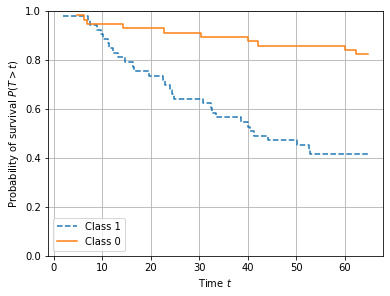

In [81]:
styles = ('-', '--', '-.', ':')

plt.figure(figsize=(6, 4.5))
for row in risk_score_assignment.itertuples():
    mask = y_train == row.Index
    #print(mask[0]) # εδω εβαλα mask[0]
    coord_x, coord_y = kaplan_meier_estimator(event_train[mask], time_train[mask])
    ls = styles[row.risk_group]
    plt.step(coord_x, coord_y, where="post", label=f"Class {row.Index}", linestyle=ls)
plt.ylim(0, 1)
plt.ylabel("Probability of survival $P(T > t)$")
plt.xlabel("Time $t$")
plt.grid()
plt.legend()

In [139]:

time.shape, event.shape, time_train.shape, time_test.shape, event_train.shape, event_test.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape

((200,),
 (200,),
 (110,),
 (90,),
 (110,),
 (90,),
 (110, 256, 256, 3),
 (90, 256, 256, 3),
 (110,),
 (90,))

In [82]:
cindex = concordance_index_censored(event_test, time_test, risk_scores[y_train.shape[0]:])

print(f"Concordance index on test data with actual risk scores: {cindex[0]:.3f}")

Concordance index on test data with actual risk scores: 0.660


In [83]:
def _make_riskset(time: np.ndarray) -> np.ndarray:
    """Compute mask that represents each sample's risk set.

    Parameters
    ----------
    time : np.ndarray, shape=(n_samples,)
        Observed event time sorted in descending order.

    Returns
    -------
    risk_set : np.ndarray, shape=(n_samples, n_samples)
        Boolean matrix where the `i`-th row denotes the
        risk set of the `i`-th instance, i.e. the indices `j`
        for which the observer time `y_j >= y_i`.
    """
    assert time.ndim == 1, "expected 1D array"

    # sort in descending order
    o = np.argsort(-time, kind="mergesort")
    n_samples = len(time)
    risk_set = np.zeros((n_samples, n_samples), dtype=np.bool_)
    for i_org, i_sort in enumerate(o):
        ti = time[i_sort]
        k = i_org
        while k < n_samples and ti == time[o[k]]:
            k += 1
        risk_set[i_sort, o[:k]] = True
    return risk_set


class InputFunction:
    """Callable input function that computes the risk set for each batch.
    
    Parameters
    ----------
    images : np.ndarray, shape=(n_samples, height, width)
        Image data.
    time : np.ndarray, shape=(n_samples,)
        Observed time.
    event : np.ndarray, shape=(n_samples,)
        Event indicator.
    batch_size : int, optional, default=64
        Number of samples per batch.
    drop_last : int, optional, default=False
        Whether to drop the last incomplete batch.
    shuffle : bool, optional, default=False
        Whether to shuffle data.
    seed : int, optional, default=89
        Random number seed.
    """

    def __init__(self,
                 images: np.ndarray,
                 time: np.ndarray,
                 event: np.ndarray,
                 batch_size: int = 64,
                 drop_last: bool = False,
                 shuffle: bool = False,
                 seed: int = 89) -> None:
        if images.ndim == 3:
            images = images[..., np.newaxis]
        self.images = images
        self.time = time
        self.event = event
        self.batch_size = batch_size
        self.drop_last = drop_last
        self.shuffle = shuffle
        self.seed = seed

    def size(self) -> int:
        """Total number of samples."""
        return self.images.shape[0]

    def steps_per_epoch(self) -> int:
        """Number of batches for one epoch."""
        return int(np.floor(self.size() / self.batch_size))

    def _get_data_batch(self, index: np.ndarray) -> Tuple[np.ndarray, Dict[str, np.ndarray]]:
        """Compute risk set for samples in batch."""
        time = self.time[index]
        event = self.event[index]
        images = self.images[index]

        labels = {
            "label_event": event.astype(np.int32),
            "label_time": time.astype(np.float32),
            "label_riskset": _make_riskset(time)
        }
        return images, labels

    def _iter_data(self) -> Iterable[Tuple[np.ndarray, Dict[str, np.ndarray]]]:
        """Generator that yields one batch at a time."""
        index = np.arange(self.size())
        rnd = np.random.RandomState(self.seed)

        if self.shuffle:
            rnd.shuffle(index)
        for b in range(self.steps_per_epoch()):
            start = b * self.batch_size
            idx = index[start:(start + self.batch_size)]
            yield self._get_data_batch(idx)

        if not self.drop_last:
            start = self.steps_per_epoch() * self.batch_size
            idx = index[start:]
            yield self._get_data_batch(idx)

    def _get_shapes(self) -> Tuple[tf.TensorShape, Dict[str, tf.TensorShape]]:
        """Return shapes of data returned by `self._iter_data`."""
        batch_size = self.batch_size if self.drop_last else None
        h, w, c = self.images.shape[1:]
        images = tf.TensorShape([batch_size, h, w, c])

        labels = {k: tf.TensorShape((batch_size,))
                  for k in ("label_event", "label_time")}
        labels["label_riskset"] = tf.TensorShape((batch_size, batch_size))
        return images, labels

    def _get_dtypes(self) -> Tuple[tf.DType, Dict[str, tf.DType]]:
        """Return dtypes of data returned by `self._iter_data`."""
        labels = {"label_event": tf.int32,
                  "label_time": tf.float32,
                  "label_riskset": tf.bool}
        return tf.float32, labels

    def _make_dataset(self) -> tf.data.Dataset:
        """Create dataset from generator."""
        ds = tf.data.Dataset.from_generator(
            self._iter_data,
            self._get_dtypes(),
            self._get_shapes()
        )
        return ds

    def __call__(self) -> tf.data.Dataset:
        return self._make_dataset()


def safe_normalize(x: tf.Tensor) -> tf.Tensor:
    """Normalize risk scores to avoid exp underflowing.

    Note that only risk scores relative to each other matter.
    If minimum risk score is negative, we shift scores so minimum
    is at zero.
    """
    x_min = tf.reduce_min(x, axis=0)
    c = tf.zeros_like(x_min)
    norm = tf.where(x_min < 0, -x_min, c)
    return x + norm


def logsumexp_masked(risk_scores: tf.Tensor,
                     mask: tf.Tensor,
                     axis: int = 0,
                     keepdims: Optional[bool] = None) -> tf.Tensor:
    """Compute logsumexp across `axis` for entries where `mask` is true."""
    risk_scores.shape.assert_same_rank(mask.shape)

    with tf.name_scope("logsumexp_masked"):
        mask_f = tf.cast(mask, risk_scores.dtype)
        risk_scores_masked = tf.math.multiply(risk_scores, mask_f)
        # for numerical stability, substract the maximum value
        # before taking the exponential
        amax = tf.reduce_max(risk_scores_masked, axis=axis, keepdims=True)
        risk_scores_shift = risk_scores_masked - amax

        exp_masked = tf.math.multiply(tf.exp(risk_scores_shift), mask_f)
        exp_sum = tf.reduce_sum(exp_masked, axis=axis, keepdims=True)
        output = amax + tf.math.log(exp_sum)
        if not keepdims:
            output = tf.squeeze(output, axis=axis)
    return output


class CoxPHLoss(tf.keras.losses.Loss):
    """Negative partial log-likelihood of Cox's proportional hazards model."""

    def __init__(self, **kwargs):
        super().__init__(**kwargs)            

    def call(self,
             y_true: Sequence[tf.Tensor],
             y_pred: tf.Tensor) -> tf.Tensor:
        """Compute loss.

        Parameters
        ----------
        y_true : list|tuple of tf.Tensor
            The first element holds a binary vector where 1
            indicates an event 0 censoring.
            The second element holds the riskset, a
            boolean matrix where the `i`-th row denotes the
            risk set of the `i`-th instance, i.e. the indices `j`
            for which the observer time `y_j >= y_i`.
            Both must be rank 2 tensors.
        y_pred : tf.Tensor
            The predicted outputs. Must be a rank 2 tensor.

        Returns
        -------
        loss : tf.Tensor
            Loss for each instance in the batch.
        """
        event, riskset = y_true
        predictions = y_pred

        pred_shape = predictions.shape
        if pred_shape.ndims != 2:
            raise ValueError("Rank mismatch: Rank of predictions (received %s) should "
                             "be 2." % pred_shape.ndims)

        if pred_shape[1] is None:
            raise ValueError("Last dimension of predictions must be known.")

        if pred_shape[1] != 1:
            raise ValueError("Dimension mismatch: Last dimension of predictions "
                             "(received %s) must be 1." % pred_shape[1])

        if event.shape.ndims != pred_shape.ndims:
            raise ValueError("Rank mismatch: Rank of predictions (received %s) should "
                             "equal rank of event (received %s)" % (
                pred_shape.ndims, event.shape.ndims))

        if riskset.shape.ndims != 2:
            raise ValueError("Rank mismatch: Rank of riskset (received %s) should "
                             "be 2." % riskset.shape.ndims)

        event = tf.cast(event, predictions.dtype)
        predictions = safe_normalize(predictions)

        with tf.name_scope("assertions"):
            assertions = (
                tf.debugging.assert_less_equal(event, 1.),
                tf.debugging.assert_greater_equal(event, 0.),
                tf.debugging.assert_type(riskset, tf.bool)
            )

        # move batch dimension to the end so predictions get broadcast
        # row-wise when multiplying by riskset
        pred_t = tf.transpose(predictions)
        # compute log of sum over risk set for each row
        rr = logsumexp_masked(pred_t, riskset, axis=1, keepdims=True)
        assert rr.shape.as_list() == predictions.shape.as_list()

        losses = tf.math.multiply(event, rr - predictions)

        return losses

In [84]:
class CindexMetric:
    """Computes concordance index across one epoch."""

    def reset_states(self) -> None:
        """Clear the buffer of collected values."""
        self._data = {
            "label_time": [],
            "label_event": [],
            "prediction": []
        }

    def update_state(self, y_true: Dict[str, tf.Tensor], y_pred: tf.Tensor) -> None:
        """Collect observed time, event indicator and predictions for a batch.

        Parameters
        ----------
        y_true : dict
            Must have two items:
            `label_time`, a tensor containing observed time for one batch,
            and `label_event`, a tensor containing event indicator for one batch.
        y_pred : tf.Tensor
            Tensor containing predicted risk score for one batch.
        """
        self._data["label_time"].append(y_true["label_time"].numpy())
        self._data["label_event"].append(y_true["label_event"].numpy())
        self._data["prediction"].append(tf.squeeze(y_pred).numpy())

    def result(self) -> Dict[str, float]:
        """Computes the concordance index across collected values.

        Returns
        ----------
        metrics : dict
            Computed metrics.
        """
        data = {}
        for k, v in self._data.items():
            data[k] = np.concatenate(v)

        results = concordance_index_censored(
            data["label_event"] == 1,
            data["label_time"],
            data["prediction"])

        result_data = {}
        names = ("cindex", "concordant", "discordant", "tied_risk")
        for k, v in zip(names, results):
            result_data[k] = v

        return result_data

In [85]:
import tensorflow.compat.v2.summary as summary
from tensorflow.python.ops import summary_ops_v2


class TrainAndEvaluateModel:

    def __init__(self, model, model_dir, train_dataset, eval_dataset,
                 learning_rate, num_epochs):
        self.num_epochs = num_epochs
        self.model_dir = model_dir

        self.model = model

        self.train_ds = train_dataset
        self.val_ds = eval_dataset

        self.optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
        self.loss_fn = CoxPHLoss()

        self.train_loss_metric = tf.keras.metrics.Mean(name="train_loss")
        self.val_loss_metric = tf.keras.metrics.Mean(name="val_loss")
        self.val_cindex_metric = CindexMetric()

    @tf.function
    def train_one_step(self, x, y_event, y_riskset):
        y_event = tf.expand_dims(y_event, axis=1)
        with tf.GradientTape() as tape:
            logits = self.model(x, training=True)

            train_loss = self.loss_fn(y_true=[y_event, y_riskset], y_pred=logits)

        with tf.name_scope("gradients"):
            grads = tape.gradient(train_loss, self.model.trainable_weights)
            self.optimizer.apply_gradients(zip(grads, self.model.trainable_weights))
        return train_loss, logits

    def train_and_evaluate(self):
        ckpt = tf.train.Checkpoint(
            step=tf.Variable(0, dtype=tf.int64),
            optimizer=self.optimizer,
            model=self.model)
        ckpt_manager = tf.train.CheckpointManager(
            ckpt, str(self.model_dir), max_to_keep=2)

        if ckpt_manager.latest_checkpoint:
            ckpt.restore(ckpt_manager.latest_checkpoint)
            print(f"Latest checkpoint restored from {ckpt_manager.latest_checkpoint}.")

        train_summary_writer = summary.create_file_writer(
            str(self.model_dir / "train"))
        val_summary_writer = summary.create_file_writer(
            str(self.model_dir / "valid"))

        for epoch in range(self.num_epochs):
            with train_summary_writer.as_default():
                self.train_one_epoch(ckpt.step)

            # Run a validation loop at the end of each epoch.
            with val_summary_writer.as_default():
                self.evaluate(ckpt.step)

        save_path = ckpt_manager.save()
        print(f"Saved checkpoint for step {ckpt.step.numpy()}: {save_path}")

    def train_one_epoch(self, step_counter):
        for x, y in self.train_ds:
            train_loss, logits = self.train_one_step(
                x, y["label_event"], y["label_riskset"])

            step = int(step_counter)
            if step == 0:
                # see https://stackoverflow.com/questions/58843269/display-graph-using-tensorflow-v2-0-in-tensorboard
                func = self.train_one_step.get_concrete_function(
                    x, y["label_event"], y["label_riskset"])
                summary_ops_v2.graph(func.graph) #, step=0)

            # Update training metric.
            self.train_loss_metric.update_state(train_loss)

            # Log every 200 batches.
            if step % 200 == 0:
                # Display metrics
                mean_loss = self.train_loss_metric.result()
                print(f"step {step}: mean loss = {mean_loss:.4f}")
                # save summaries
                summary.scalar("loss", mean_loss, step=step_counter)
                # Reset training metrics
                self.train_loss_metric.reset_states()

            step_counter.assign_add(1)

    @tf.function
    def evaluate_one_step(self, x, y_event, y_riskset):
        y_event = tf.expand_dims(y_event, axis=1)
        val_logits = self.model(x, training=False)
        val_loss = self.loss_fn(y_true=[y_event, y_riskset], y_pred=val_logits)
        return val_loss, val_logits

    def evaluate(self, step_counter):
        self.val_cindex_metric.reset_states()
        
        for x_val, y_val in self.val_ds:
            val_loss, val_logits = self.evaluate_one_step(
                x_val, y_val["label_event"], y_val["label_riskset"])

            # Update val metrics
            self.val_loss_metric.update_state(val_loss)
            self.val_cindex_metric.update_state(y_val, val_logits)

        val_loss = self.val_loss_metric.result()
        summary.scalar("loss",
                       val_loss,
                       step=step_counter)
        self.val_loss_metric.reset_states()
        
        val_cindex = self.val_cindex_metric.result()
        for key, value in val_cindex.items():
            summary.scalar(key, value, step=step_counter)

        print(f"Validation: loss = {val_loss:.4f}, cindex = {val_cindex['cindex']:.4f}")

2d model

In [86]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, kernel_size=(5, 5), activation='relu', name='conv_1'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(16, (5, 5), activation='relu', name='conv_2'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu', name='dense_1'),
    tf.keras.layers.Dense(84, activation='relu', name='dense_2'),
    tf.keras.layers.Dense(1, activation='linear', name='dense_3')
])

In [23]:
x_train = x_train[:160]
x_test = x_test[:40]

time_train = time_train[:160]
time_test = time_test[:40]

event_train = event_train[:160]
event_test = event_test[:40]

print(x_train.shape)
print(x_test.shape)
print(time_train.shape)
print(time_test.shape)
print(event_train.shape)
print(event_test.shape)

(160, 28, 28)
(40, 28, 28)
(160,)
(40,)
(160,)
(40,)


In [73]:
print(x_train.shape)
print(x_test.shape)
print(time_train.shape)
print(time_test.shape)
print(event_train.shape)
print(event_test.shape)

(546, 28, 28)
(156, 28, 28)
(546,)
(156,)
(546,)
(156,)


In [103]:
768/64

12.0

In [66]:
28/64

0.4375

In [83]:
(1024+256)/2

640.0

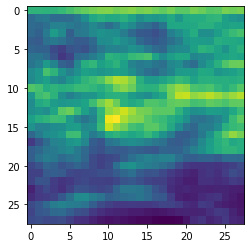

In [75]:
plt.imshow(x_train[0])

In [87]:
train_fn = InputFunction(x_train, time_train, event_train,
                  drop_last=True,
                  shuffle=True)

eval_fn = InputFunction(x_test, time_test, event_test)

trainer = TrainAndEvaluateModel(
    model=model,
    model_dir=Path("ckpts-mnist-cnnn"),
    train_dataset=train_fn(),
    eval_dataset=eval_fn(),
    learning_rate=0.0001,
    num_epochs=300,
)

In [88]:
trainer.train_and_evaluate()

step 0: mean loss = 10.3087
Validation: loss = 17.7597, cindex = 0.5011
Validation: loss = 11.9840, cindex = 0.5446
Validation: loss = 17.5608, cindex = 0.5489
Validation: loss = 17.2715, cindex = 0.5281
Validation: loss = 14.2475, cindex = 0.5299
Validation: loss = 11.3847, cindex = 0.5475
Validation: loss = 13.6606, cindex = 0.5518
Validation: loss = 12.9373, cindex = 0.5658
Validation: loss = 10.6386, cindex = 0.5662
Validation: loss = 10.2892, cindex = 0.5608
Validation: loss = 11.3988, cindex = 0.5601
Validation: loss = 12.1740, cindex = 0.5529
Validation: loss = 12.1972, cindex = 0.5550
Validation: loss = 11.8074, cindex = 0.5507
Validation: loss = 11.2669, cindex = 0.5421
Validation: loss = 10.7311, cindex = 0.5263
Validation: loss = 10.3491, cindex = 0.5151
Validation: loss = 10.1818, cindex = 0.5158
Validation: loss = 10.1224, cindex = 0.5234
Validation: loss = 10.1376, cindex = 0.5216
Validation: loss = 10.1468, cindex = 0.5144
Validation: loss = 10.1546, cindex = 0.5068
Vali

Validation: loss = 14.2969, cindex = 0.5050
Validation: loss = 14.3195, cindex = 0.5054
Validation: loss = 14.3425, cindex = 0.5054
Validation: loss = 14.3656, cindex = 0.5054
Validation: loss = 14.3888, cindex = 0.5050
Validation: loss = 14.4121, cindex = 0.5047
Validation: loss = 14.4354, cindex = 0.5050
Validation: loss = 14.4586, cindex = 0.5050
Validation: loss = 14.4818, cindex = 0.5050
Validation: loss = 14.5051, cindex = 0.5054
Validation: loss = 14.5287, cindex = 0.5054
Validation: loss = 14.5525, cindex = 0.5065
Validation: loss = 14.5766, cindex = 0.5061
step 200: mean loss = 0.6459
Validation: loss = 14.6009, cindex = 0.5061
Validation: loss = 14.6252, cindex = 0.5058
Validation: loss = 14.6494, cindex = 0.5054
Validation: loss = 14.6741, cindex = 0.5054
Validation: loss = 14.6991, cindex = 0.5047
Validation: loss = 14.7243, cindex = 0.5047
Validation: loss = 14.7496, cindex = 0.5047
Validation: loss = 14.7752, cindex = 0.5047
Validation: loss = 14.8012, cindex = 0.5047
Val

FEATURE EXTRACTOR

In [147]:
from keras.models import Model
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

VISUALIZATION 

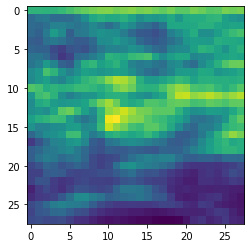

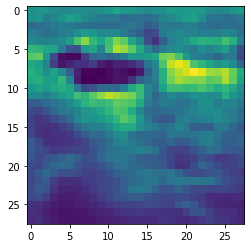

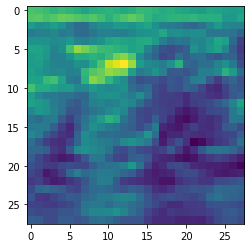

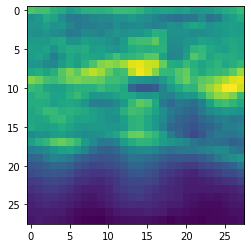

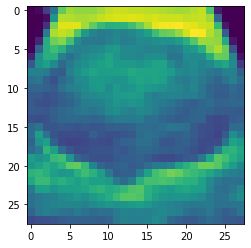

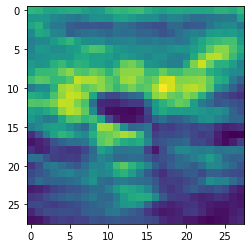

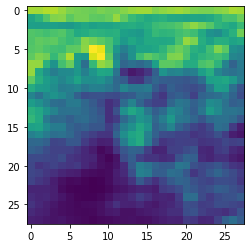

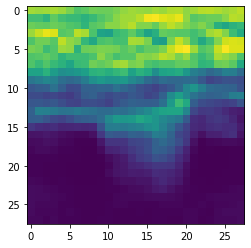

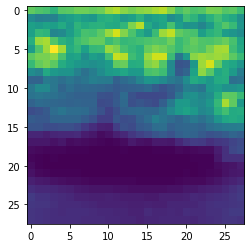

In [93]:
import matplotlib.pyplot as plt 
for i in range(9):
    plt.imshow(x_train[i])
    plt.show()

In [149]:
x_test[0].shape

(256, 256, 3)

FEATURE EXTRACTION

In [150]:
import numpy as np 

vectors_extracted = []
for i in range(len(x_test)):
  features = model.predict(x_test[i].reshape(1, 256, 256,3))
  vectors_extracted.append(features)

RESHAPE THE VECTORS

In [151]:
print(np.asarray(vectors_extracted).shape)
vectors_reshaped = np.asarray(vectors_extracted).reshape(np.asarray(vectors_extracted).shape[0],np.asarray(vectors_extracted).shape[2])
vectors_reshaped.shape

(90, 1, 84)


(90, 84)

CREATE HOLISTIC TABLES

In [ ]:
holistic_table = pd.DataFrame(event_test, columns=['Events'])
holistic_table

In [ ]:
holistic_table['Time'] = pd.DataFrame(time_test)

holistic_table

TSNE

In [ ]:
import seaborn as sns 

from sklearn.manifold import TSNE
vectors_reshaped[0]
X_embedded = TSNE(n_components=2).fit_transform(vectors_reshaped)
X_embedded.shape

PCA

In [ ]:
rom sklearn.decomposition import PCA

# reduce the amount of dimensions in the feature vector
pca = PCA(n_components=2, random_state=22)
pca.fit(vectors_reshaped.reshape(vectors_reshaped.shape[0], vectors_reshaped.shape[2]))
X_embedded_pca = pca.transform(vectors_reshaped.reshape(vectors_reshaped.shape[0], vectors_reshaped.shape[2]))

KMEANS

In [ ]:
# clustering and dimension reduction
from sklearn.cluster import KMeans


# cluster feature vectors
kmeans = KMeans(n_clusters=2,n_jobs=-1)
kmeans.fit(X_embedded_pca) # use X_embedded or X_embedded_pca here if you want to include dimensionality reduction in your process

USE KMEANS LABELS

In [ ]:
holistic_table['Labels'] = pd.DataFrame(kmeans.labels_)

holistic_table.head()

       Labels
0   High Risk
1   High Risk
2   High Risk
3   High Risk
4    Low Risk
..        ...
85   Low Risk
86  High Risk
87  High Risk
88  High Risk
89  High Risk

[90 rows x 1 columns]


C:\Users\geo_m\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


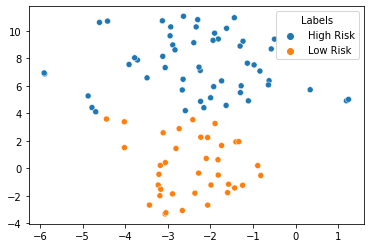

In [160]:
table_ = pd.DataFrame(holistic_table['Labels'].values, columns = ['Labels'])

table_.loc[table_['Labels'] == 1, 'Labels'] = 'Low Risk'
table_.loc[table_['Labels'] == 0, 'Labels'] = 'High Risk'
print(table_)
ax = sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=table_['Labels'], legend='full')
ax.axes.xaxis.set_visible(True)
ax.axes.yaxis.set_visible(True)
plt.show()

In [155]:
holistic_table = pd.DataFrame(event_test, columns=['Events'])
holistic_table

,Events
0,False
1,False
2,False
3,True
4,True
...,...
85,True
86,False
87,False
88,False


    Events       Time  Labels
4     True  12.064034       1
5    False  65.844015       1
10    True   2.205474       1
13    True  41.645128       1
14    True  52.422047       1
15   False  65.844015       1
19    True  25.719371       1
23    True   3.568875       1
24    True  15.878704       1
25    True  10.404396       1
28    True  16.804745       1
29    True  32.898282       1
31   False  65.844015       1
35   False  65.844015       1
36   False  65.844015       1
37    True   8.470157       1
38   False  65.844015       1
40    True  56.053686       1
42    True  10.186546       1
43   False  65.844015       1
45   False  65.844015       1
46    True  38.654046       1
58   False  65.844015       1
61    True  44.177043       1
62   False  65.844015       1
63    True  35.945414       1
64    True  21.343322       1
65   False  65.844015       1
72    True  53.086427       1
73    True   1.460756       1
74    True  20.960045       1
75    True  38.195881       1
78    True

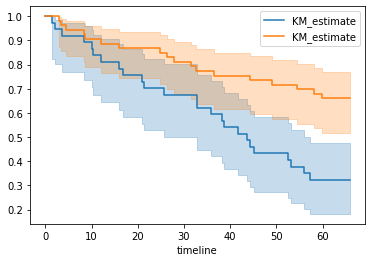

In [157]:
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test, multivariate_logrank_test

group_1 = holistic_table[holistic_table['Labels'] == 1]
print(group_1)
group_0 = holistic_table[holistic_table['Labels'] == 0]
print(group_0)
#group_2 = holistic_table[holistic_table['Labels'] == 2]
#print(group_2)
#group_3 = holistic_table[holistic_table['Labels'] == 3]
#print(group_3)

kmf1 = KaplanMeierFitter() 
kmf1.fit(group_1['Time'], group_1['Events'])

kmf0 = KaplanMeierFitter() 
kmf0.fit(group_0['Time'], group_0['Events'])

#kmf2 = KaplanMeierFitter() 
#kmf2.fit(group_2['Time'], group_2['Events'])

#kmf3 = KaplanMeierFitter() 
#kmf3.fit(group_3['Time'], group_3['Events'])

ax = kmf1.plot()
ax = kmf0.plot(ax = ax)
#ax = kmf2.plot(ax = ax)
#ax = kmf3.plot(ax = ax)

#ax.set_ylim([0.0, 1.0])


print(group_1.shape)
print(group_0.shape)
#print(group_2.shape)
#print(group_3.shape)

#results = multivariate_logrank_test(holistic_table['Time'], holistic_table['Labels'], holistic_table['Events'])
results = logrank_test(group_1['Time'], group_0['Time'], event_observed_A=group_1['Events'], event_observed_B=group_0['Events'])

In [158]:
results.p_value

0.001721252858912975

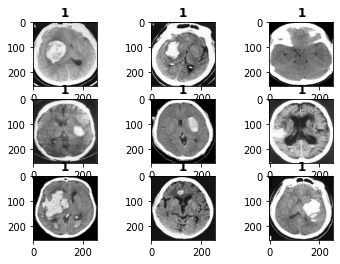

In [176]:
from matplotlib import pyplot
for i in range(0,9):
    pyplot.subplot(330 + 1 + i)
    j = group_1.index[i]
    plt.imshow(x_test[j])
    #tag = info.iloc[j]['Contrast']
    tag = holistic_table.iloc[j]['Labels']
    plt.title(tag,fontweight ="bold")
plt.show()

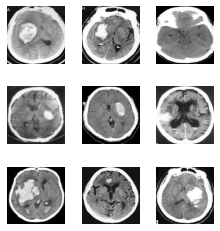

In [191]:
label_list = pd.DataFrame(y_test, columns=['Label'])
for i in range(0,9):
    pyplot.subplot(330 + 1 + i)
    j = group_1.index[i]
    tag = label_list.iloc[j]['Label']
    #tag = info.iloc[j]['Contrast']
    plt.imshow(x_test[j])
    plt.axis("off")
    #plt.title('label:'+str(tag),fontweight ="bold")
pyplot.subplots_adjust(hspace=0.4, wspace=-0.6)
plt.show()

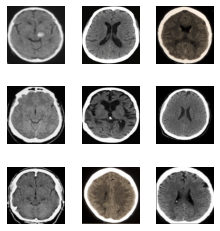

In [192]:
label_list = pd.DataFrame(y_test, columns=['Label'])
for i in range(20,29):
    pyplot.subplot(310 + 1 + i)
    j = group_0.index[i]
    tag = label_list.iloc[j]['Label']
    #tag = info.iloc[j]['Contrast']
    plt.imshow(x_test[j])
    plt.axis("off")
    #plt.title('label:'+str(tag),fontweight ="bold")
pyplot.subplots_adjust(hspace=0.4, wspace=-0.6)
plt.show()

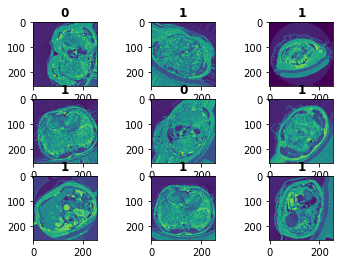

In [561]:
for i in range(0,9):
    pyplot.subplot(330 + 1 + i)
    j = group_0.index[i]
    plt.imshow(X_test[j])
    #tag = info.iloc[j]['Contrast']
    tag = label_list.iloc[j]['Label']
    plt.title(tag,fontweight ="bold")
plt.show()

In [510]:
group_0.shape, group_1.shape, X_test.shape

((194, 3), (256, 3), (450, 256, 256, 1))

In [511]:
194+256

450

In [523]:
import pandas as pd
info = pd.read_csv('C:\\Users\\geo_m\\Downloads\\overview.csv')
info_ = info.drop(columns=['Unnamed: 0'])
info_.describe()

,Age,id
count,100.000000,100.000000
mean,67.480000,49.500000
std,9.274141,29.011492
min,39.000000,0.000000
25%,61.000000,24.750000
50%,70.000000,49.500000
75%,74.000000,74.250000
max,83.000000,99.000000
